# stones detection

In [21]:
import mmcv
from mmcv import Config
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import matplotlib.pyplot as plt
import numpy as np


In [2]:
cfg = Config.fromfile('configs/custom_maskrcnn.py')

In [3]:
#print(cfg.pretty_text)

In [4]:
cfg.data.samples_per_gpu=1

/home/euloo/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


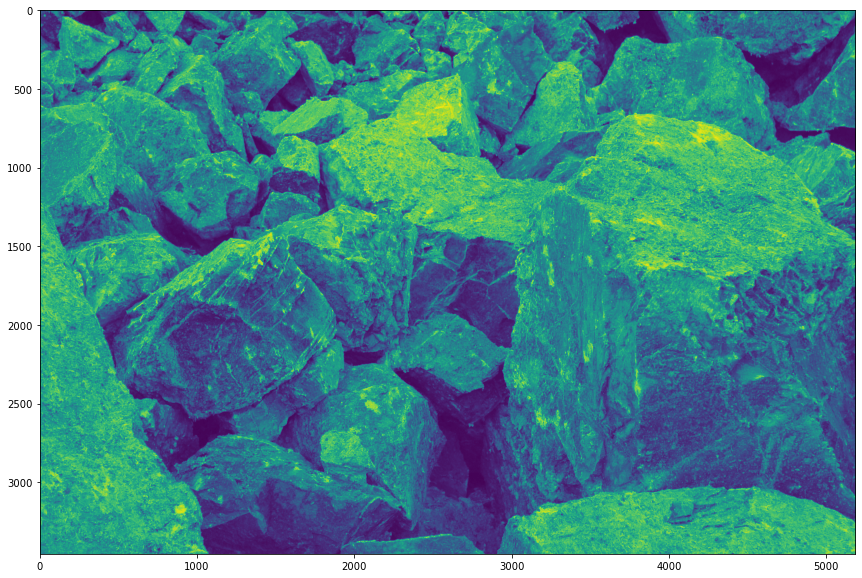

In [86]:
img = mmcv.imread('/home/euloo/Documents/datasets/stones_detection/images/IMG_2627.jpg', flag='grayscale')
plt.figure(figsize=(15, 10))
plt.imshow(img) # mmcv.bgr2rgb(
plt.show()

In [87]:
# Setup a checkpoint file to load
checkpoint = 'checkpoints/latest.pth'

In [88]:
# initialize the detector
model = init_detector(cfg, checkpoint, device='cuda:0')
model.CLASSES = ('stone', ) # UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
model.classes = model.CLASSES
result = inference_detector(model, img)

/home/euloo/mmdetection/mmdet/apis/inference.py:42: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [89]:
#result

/home/euloo/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
img.shape

(3456, 5184)

In [91]:
img = np.stack((img,)*3, axis=-1)

In [92]:
img.shape

(3456, 5184, 3)

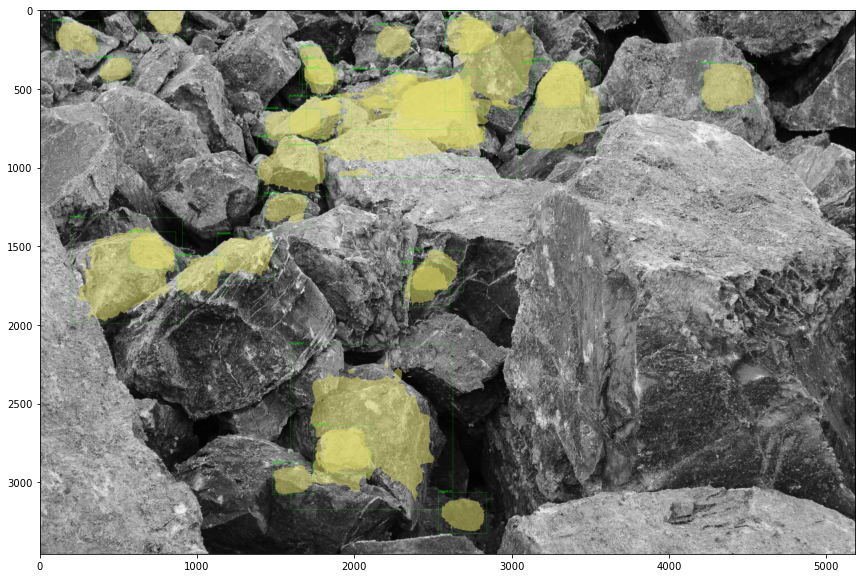

In [93]:

show_result_pyplot(model, img, result, score_thr=0.6)
